In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


In [3]:
def abs_sobel_thresh(image, orient='x', sobel_kernel=3, thresh=(0, 255), nchannels = 1):
    # Convert to grayscale if the image is color
    if nchannels == 3:
        image   = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

    if orient == 'x':
        sobel = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize = sobel_kernel)
    else:
        sobel = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize = sobel_kernel)
    
    abs_sobel       = np.absolute(sobel)    
    scaled_sobel    = np.uint8(255*abs_sobel/np.max(abs_sobel))
    
    grad_binary     = np.zeros_like(scaled_sobel)
    grad_binary[(thresh[0] <= scaled_sobel) & (scaled_sobel <= thresh[1])] = 1
    return grad_binary

def mag_thresh(image, sobel_kernel=3, mag_thresh=(0, 255), nchannels = 1):
    # Convert to grayscale if the image is color
    if nchannels == 3:
        image   = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

    sobelx = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize = sobel_kernel)
    sobely = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize = sobel_kernel)
    
    abs_sobel       = np.sqrt(np.square(sobelx) + np.square(sobely))    
    scaled_sobel    = np.uint8(255*abs_sobel/np.max(abs_sobel))
    
    mag_binary  = np.zeros_like(scaled_sobel)
    mag_binary[(mag_thresh[0] <= scaled_sobel) & (scaled_sobel <= mag_thresh[1])] = 1
    return mag_binary

def dir_threshold(image, sobel_kernel=3, thresh=(0, np.pi/2), nchannels = 1):
    # Convert to grayscale if the image is color
    if nchannels == 3:
        image   = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

    abs_sobelx = np.absolute(cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize = sobel_kernel))
    abs_sobely = np.absolute(cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize = sobel_kernel))
    
    grad_direction  = np.arctan2(abs_sobely, abs_sobelx)  
    print([np.min(grad_direction), np.max(grad_direction)])
    dir_binary      = np.zeros_like(grad_direction)
    dir_binary[(thresh[0] <= grad_direction) & (grad_direction <= thresh[1])] = 1
    return dir_binary

def hls_select(img, thresh=(0, 255)):
    hls = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
    S = hls[:,:,2]
    S = np.absolute(S).astype(float)
    S = np.uint8(255*S/np.max(S))
    
    # 3) Return a binary image of threshold result
    binary_output = np.zeros_like(S) 
    binary_output[(thresh[0] < S) & (S <= thresh[1])] = 1
    return binary_output
    



[0.0, 1.5707963267948966]


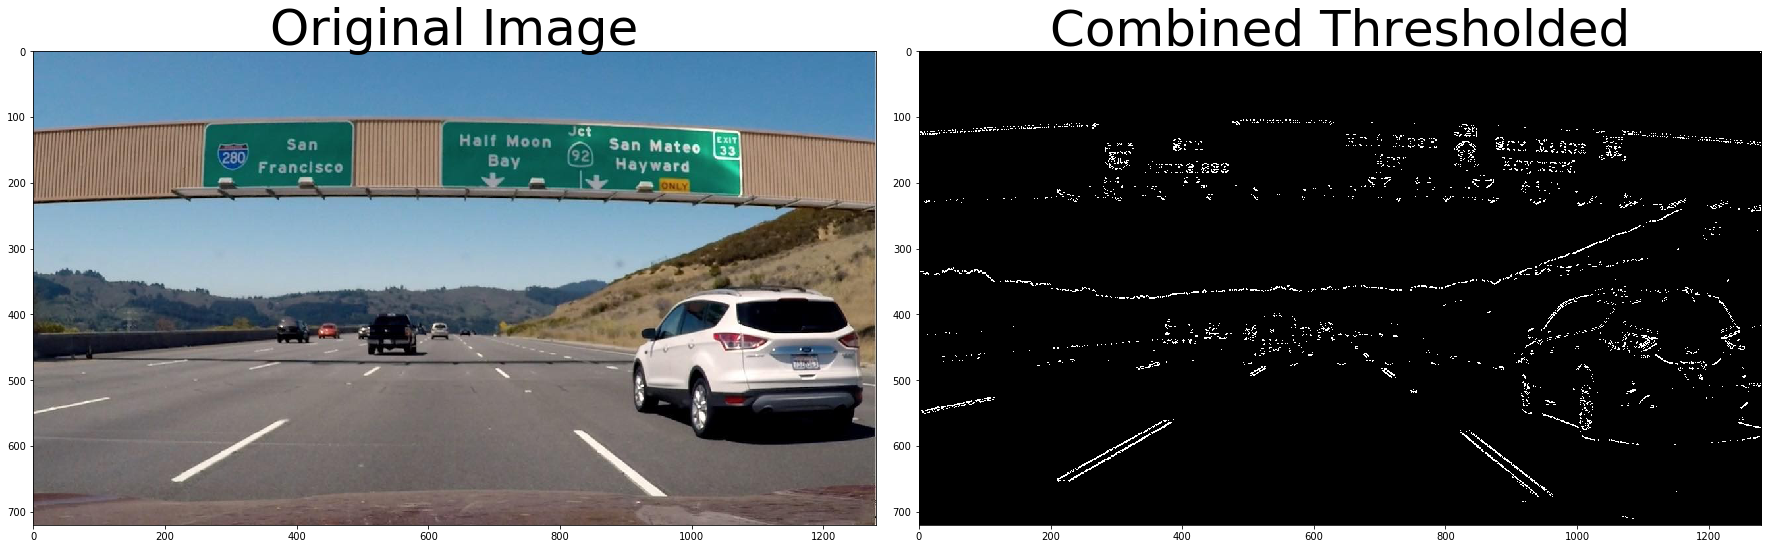

In [4]:
# Read in an image and grayscale it
image   = mpimg.imread('signs_vehicles_xygrad.png')
gray    = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

# Choose a Sobel kernel size
ksize = 3 # Choose a larger odd number to smooth gradient measurements

# Apply each of the thresholding functions
gradx = abs_sobel_thresh(image, orient='x', sobel_kernel=ksize, thresh=(10, 100), nchannels = 3)
grady = abs_sobel_thresh(image, orient='y', sobel_kernel=ksize, thresh=(30, 100), nchannels = 3)
mag_binary = mag_thresh(image, sobel_kernel=ksize, mag_thresh=(50, 300), nchannels = 3)
dir_binary = dir_threshold(image, sobel_kernel=ksize, thresh=(0, 1.5), nchannels = 3)

image_binary = np.ones_like(gradx)
image_binary[gradx == 0] = 0
image_binary[grady == 0] = 0
image_binary[mag_binary == 0] = 0
image_binary[dir_binary == 0] = 0
# Plot the result
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(image)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(image_binary, cmap='gray')
ax2.set_title('Combined Thresholded', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)


In [13]:
img = image[0:4,1:10,1]
print(img)
np.sum(img[:img.shape[0]//2,:], axis=1)

[[0.654902   0.5411765  0.54509807 0.58431375 0.5647059  0.54509807
  0.54509807 0.54509807 0.5411765 ]
 [0.6156863  0.5254902  0.5372549  0.57254905 0.5568628  0.54509807
  0.5529412  0.54509807 0.54509807]
 [0.5647059  0.5176471  0.53333336 0.56078434 0.54901963 0.54509807
  0.5647059  0.54509807 0.54901963]
 [0.54509807 0.5294118  0.54901963 0.5568628  0.5411765  0.54901963
  0.5686275  0.54901963 0.5529412 ]]


array([5.066667 , 4.9960785], dtype=float32)

In [ ]:
thresh = [0.3, 1]
hls         = cv2.cvtColor(image, cv2.COLOR_RGB2HLS)
S           = hls[:,:,2]
S_binary    = np.zeros_like(S)
S_binary[(thresh[0] < S) & (S <= thresh[1])] = 1
plt.imshow(S_binary, cmap='gray')
plt.show()
plt.imshow(S, cmap='gray')
plt.show()

In [ ]:
# Apply each of the thresholding functions
gradx = abs_sobel_thresh(image, orient='x', sobel_kernel=ksize, thresh=(10, 100), nchannels = 3)
grady = abs_sobel_thresh(image, orient='y', sobel_kernel=ksize, thresh=(30, 100), nchannels = 3)
mag_binary = mag_thresh(image, sobel_kernel=ksize, mag_thresh=(50, 300), nchannels = 3)
dir_binary = dir_threshold(image, sobel_kernel=ksize, thresh=(0, 1.4), nchannels = 3)
hls_binary = hls_select(image, thresh=(60, 255))

image_binary = np.zeros_like(gradx)
image_binary[gradx == 1] = 1
image_binary[grady == 1] = 1
#image_binary[mag_binary == 0] = 0
image_binary[dir_binary == 0] = 0
# Plot the result
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(image)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(image_binary, cmap='gray')
ax2.set_title('Combined Thresholded', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)


[0.0, 1.5707963267948966]


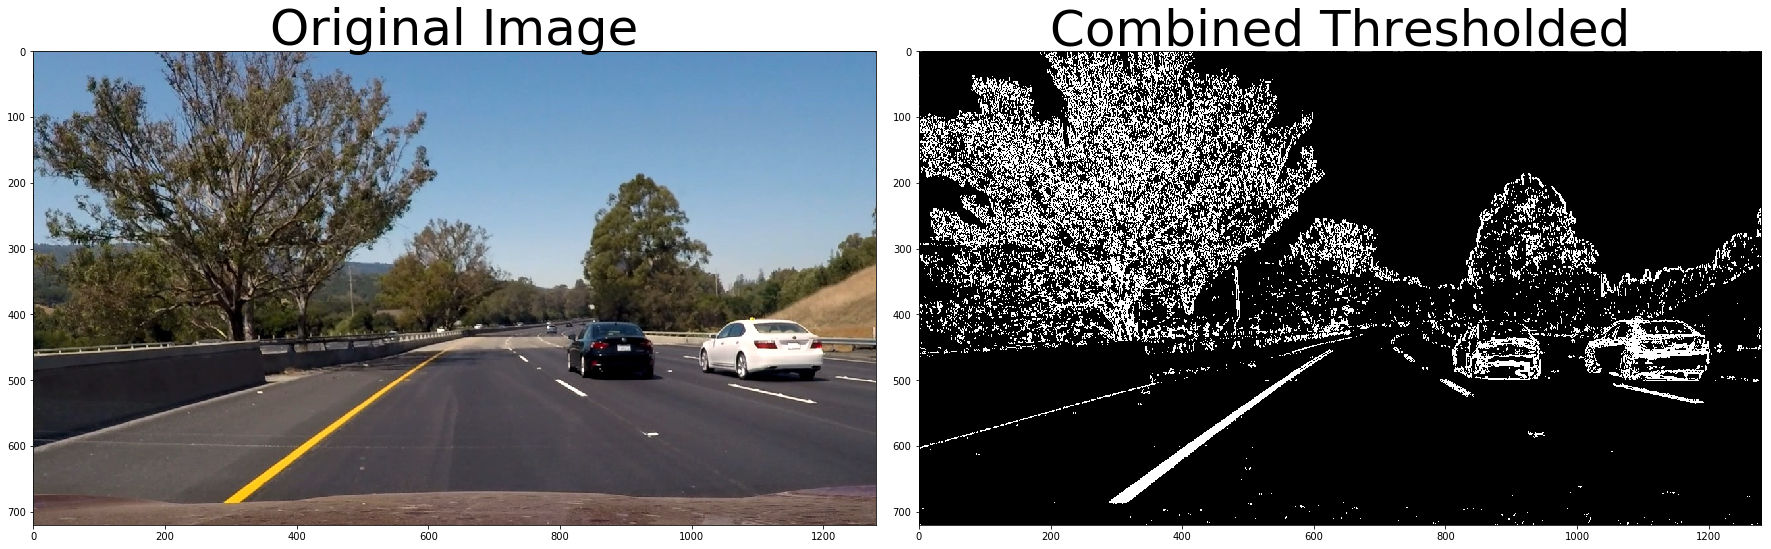

In [107]:
# Read in an image and grayscale it
image   = mpimg.imread('test6.jpg')
#image   = mpimg.imread('signs_vehicles_xygrad.png')
gray    = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
#hls     = cv2.cvtColor(image, cv2.COLOR_RGB2HLS)
#S       = np.absolute(hls[:,:,2]).astype(float)
#gray    = np.uint8(255*S/np.max(S))

# Choose a Sobel kernel size
ksize =3 # Choose a larger odd number to smooth gradient measurements

# Apply each of the thresholding functions
gradx = abs_sobel_thresh(gray, orient='x', sobel_kernel=ksize, thresh=(20, 100), nchannels = 1)
grady = abs_sobel_thresh(gray, orient='y', sobel_kernel=ksize, thresh=(20, 100), nchannels = 1)
mag_binary = mag_thresh(gray, sobel_kernel=ksize, mag_thresh=(10, 255), nchannels = 1)
dir_binary = dir_threshold(gray, sobel_kernel=ksize, thresh=(0, 1.4), nchannels = 1)
hls_binary = hls_select(image, thresh=(170, 255))

image_binary = np.zeros_like(gradx)
image_binary[gradx == 1] = 1
#image_binary[grady == 1] = 1
image_binary[hls_binary == 1] = 1
#image_binary[mag_binary == 0] = 0
#image_binary[dir_binary == 0] = 0
# Plot the result
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(image)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(image_binary, cmap='gray')
ax2.set_title('Combined Thresholded', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)